In [1]:
c_orange_d = '#FF5722'
c_orange = '#FF9800'
c_red = '#D32F2F'
c_green_d = '#388E3C'
c_green = '#4CAF50'
c_blue_d = '#303F9F'
c_blue_l = '#2196F3'
c_teal_d = '#00796B'
c_purple = '#9C27B0'
c_purple_d = '#512DA8'
c_yellow_d = '#FFA000'
c_yellow = '#FFC107'
c_grey = '#607D8B'
c_grey_d = '#455A64'

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# sns.set_style('white')
sns.set_context("poster")

In [3]:
df = pd.read_hdf('elite_sen_3.h5', 'table')
dft = df['trf_count'].loc['2016-09-01':]
dft.head()

del [df]

In [4]:
from matplotlib import rcParams
rcParams['agg.path.chunksize'] = 10000

In [5]:
dft2 = dft.resample('1800S').sum()

In [6]:
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

(array([ 736206.,  736220.,  736234.,  736248.,  736262.,  736276.,
         736290.,  736304.,  736318.,  736332.]),
 <a list of 10 Text xticklabel objects>)

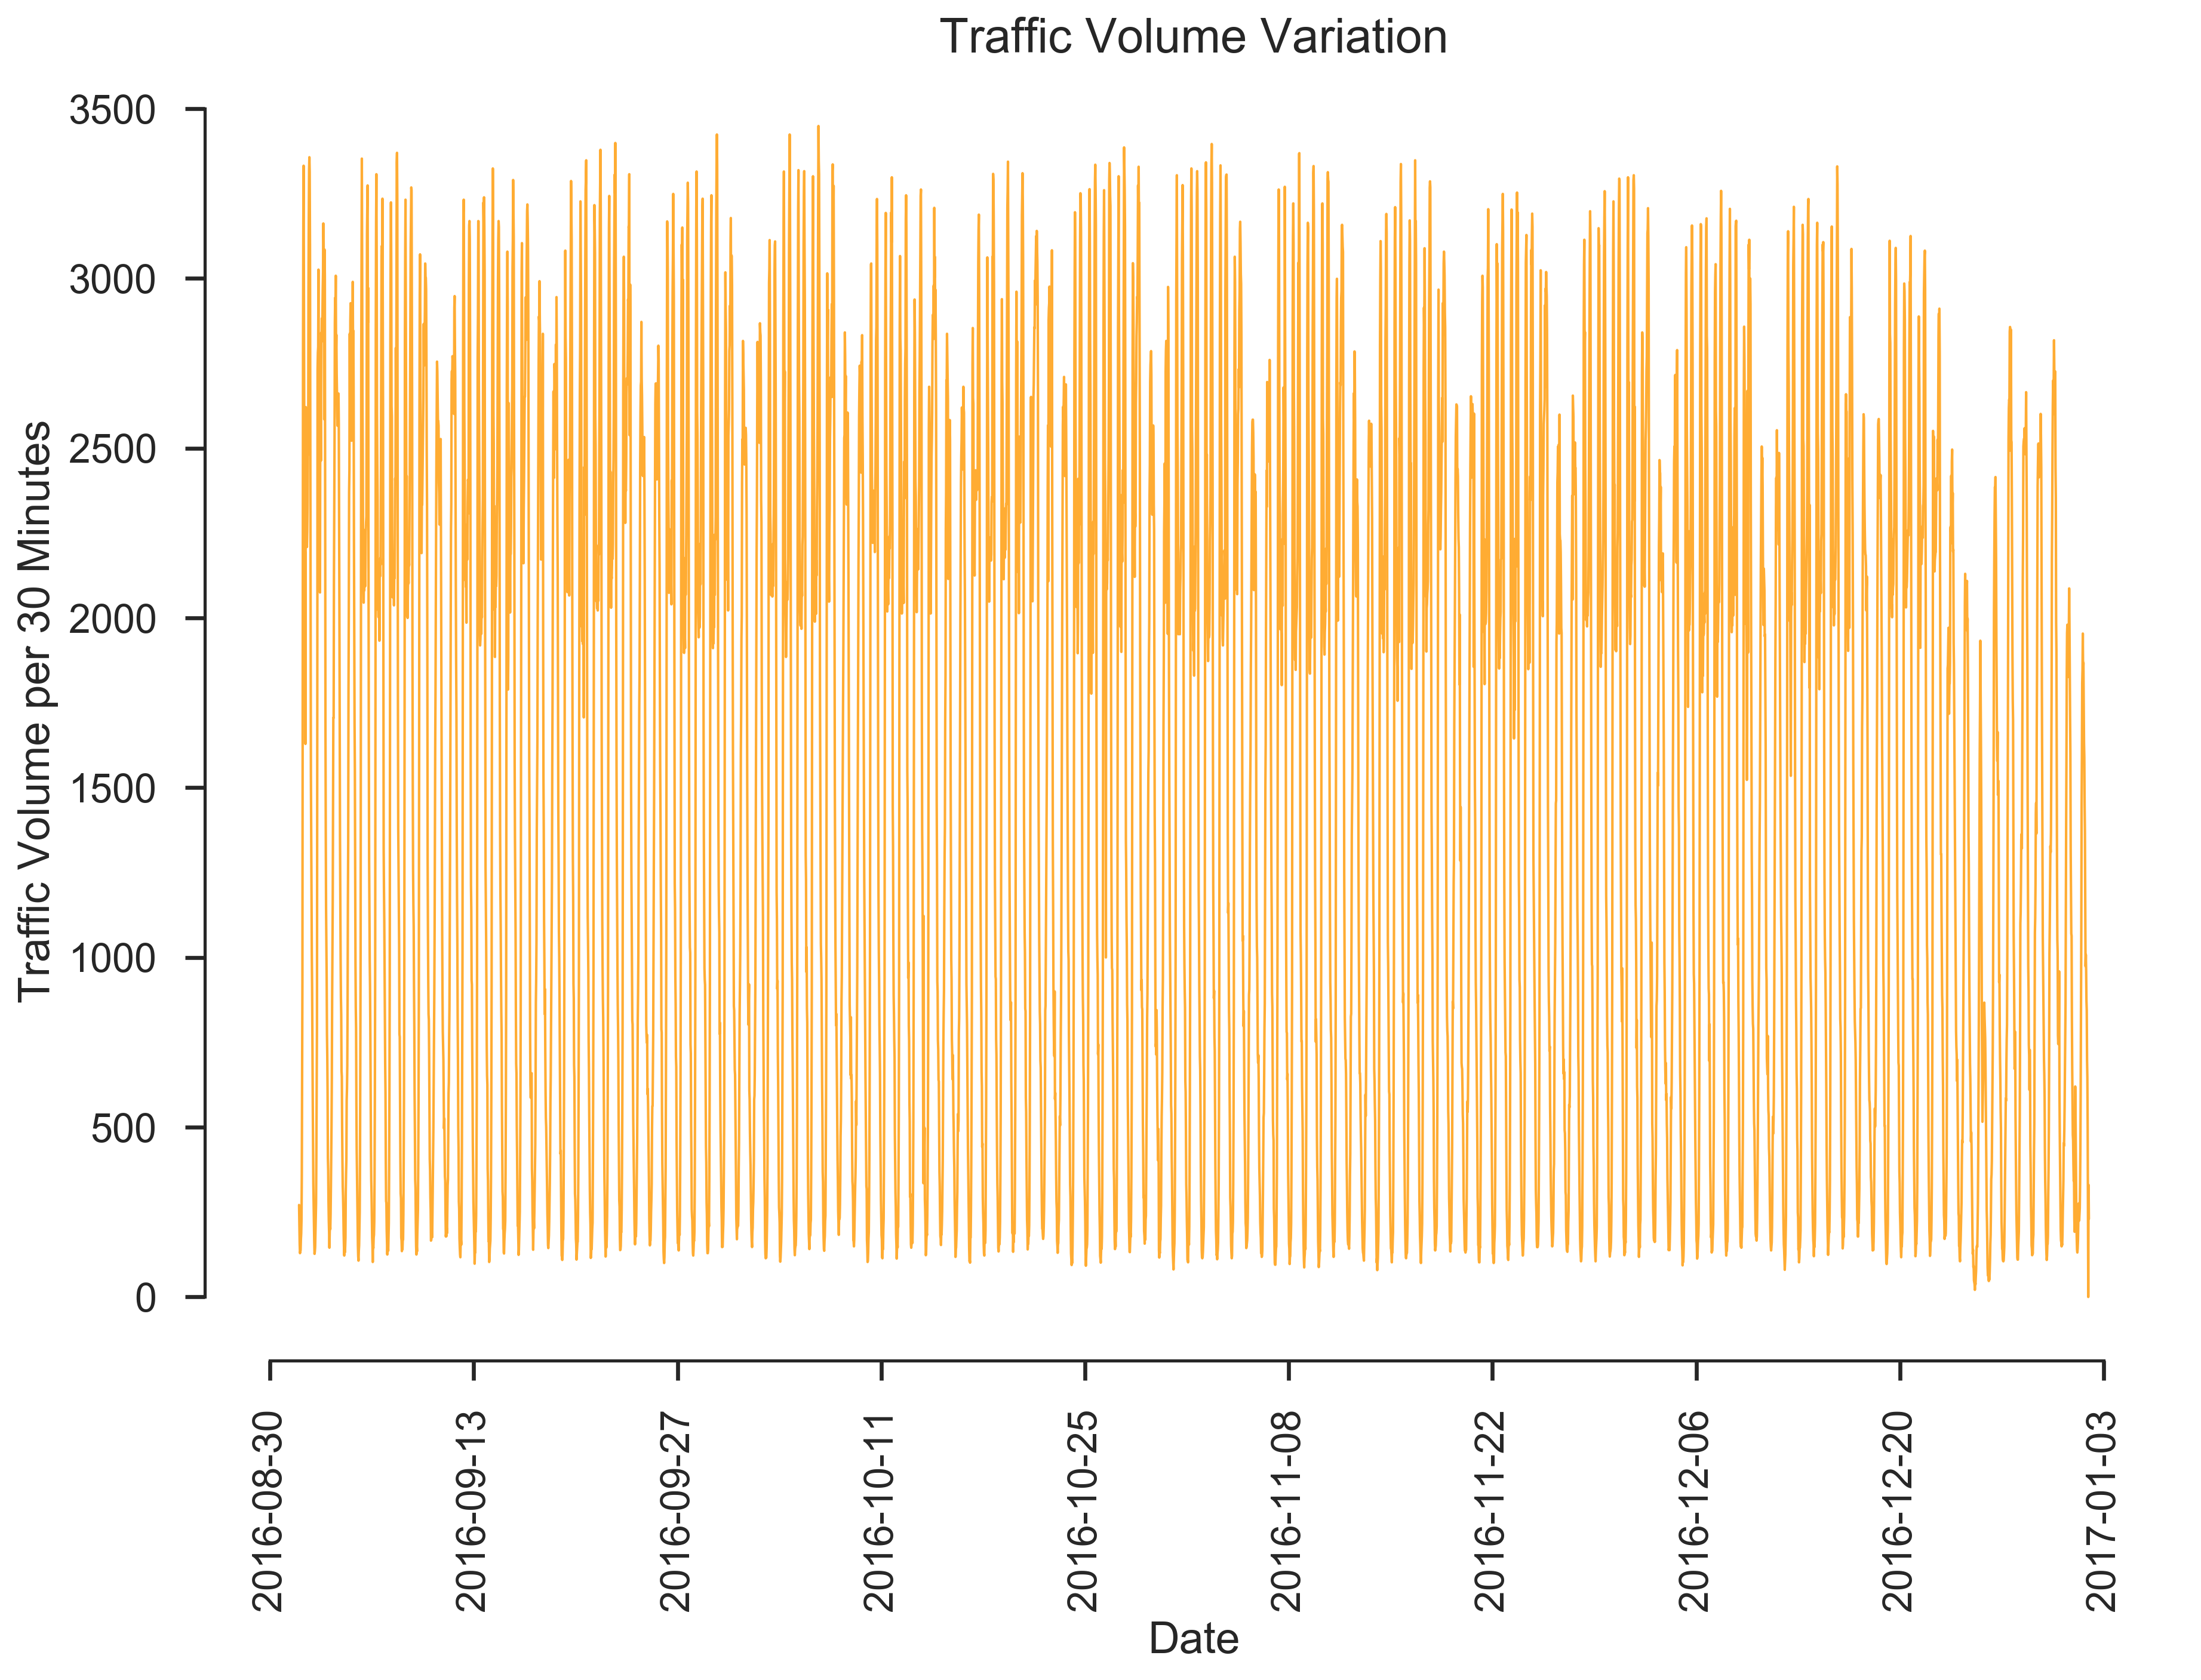

In [26]:
plt.figure(dpi=300)
plt.plot(dft2.loc['2016-09-01':'2017-01-01'], linewidth=1, color=c_orange, alpha=0.8)
plt.title('Traffic Volume Variation')
plt.ylabel('Traffic Volume per 30 Minutes')
plt.xlabel('Date')
plt.tight_layout()
sns.despine(offset=2, trim=True)
plt.xticks(rotation='vertical')

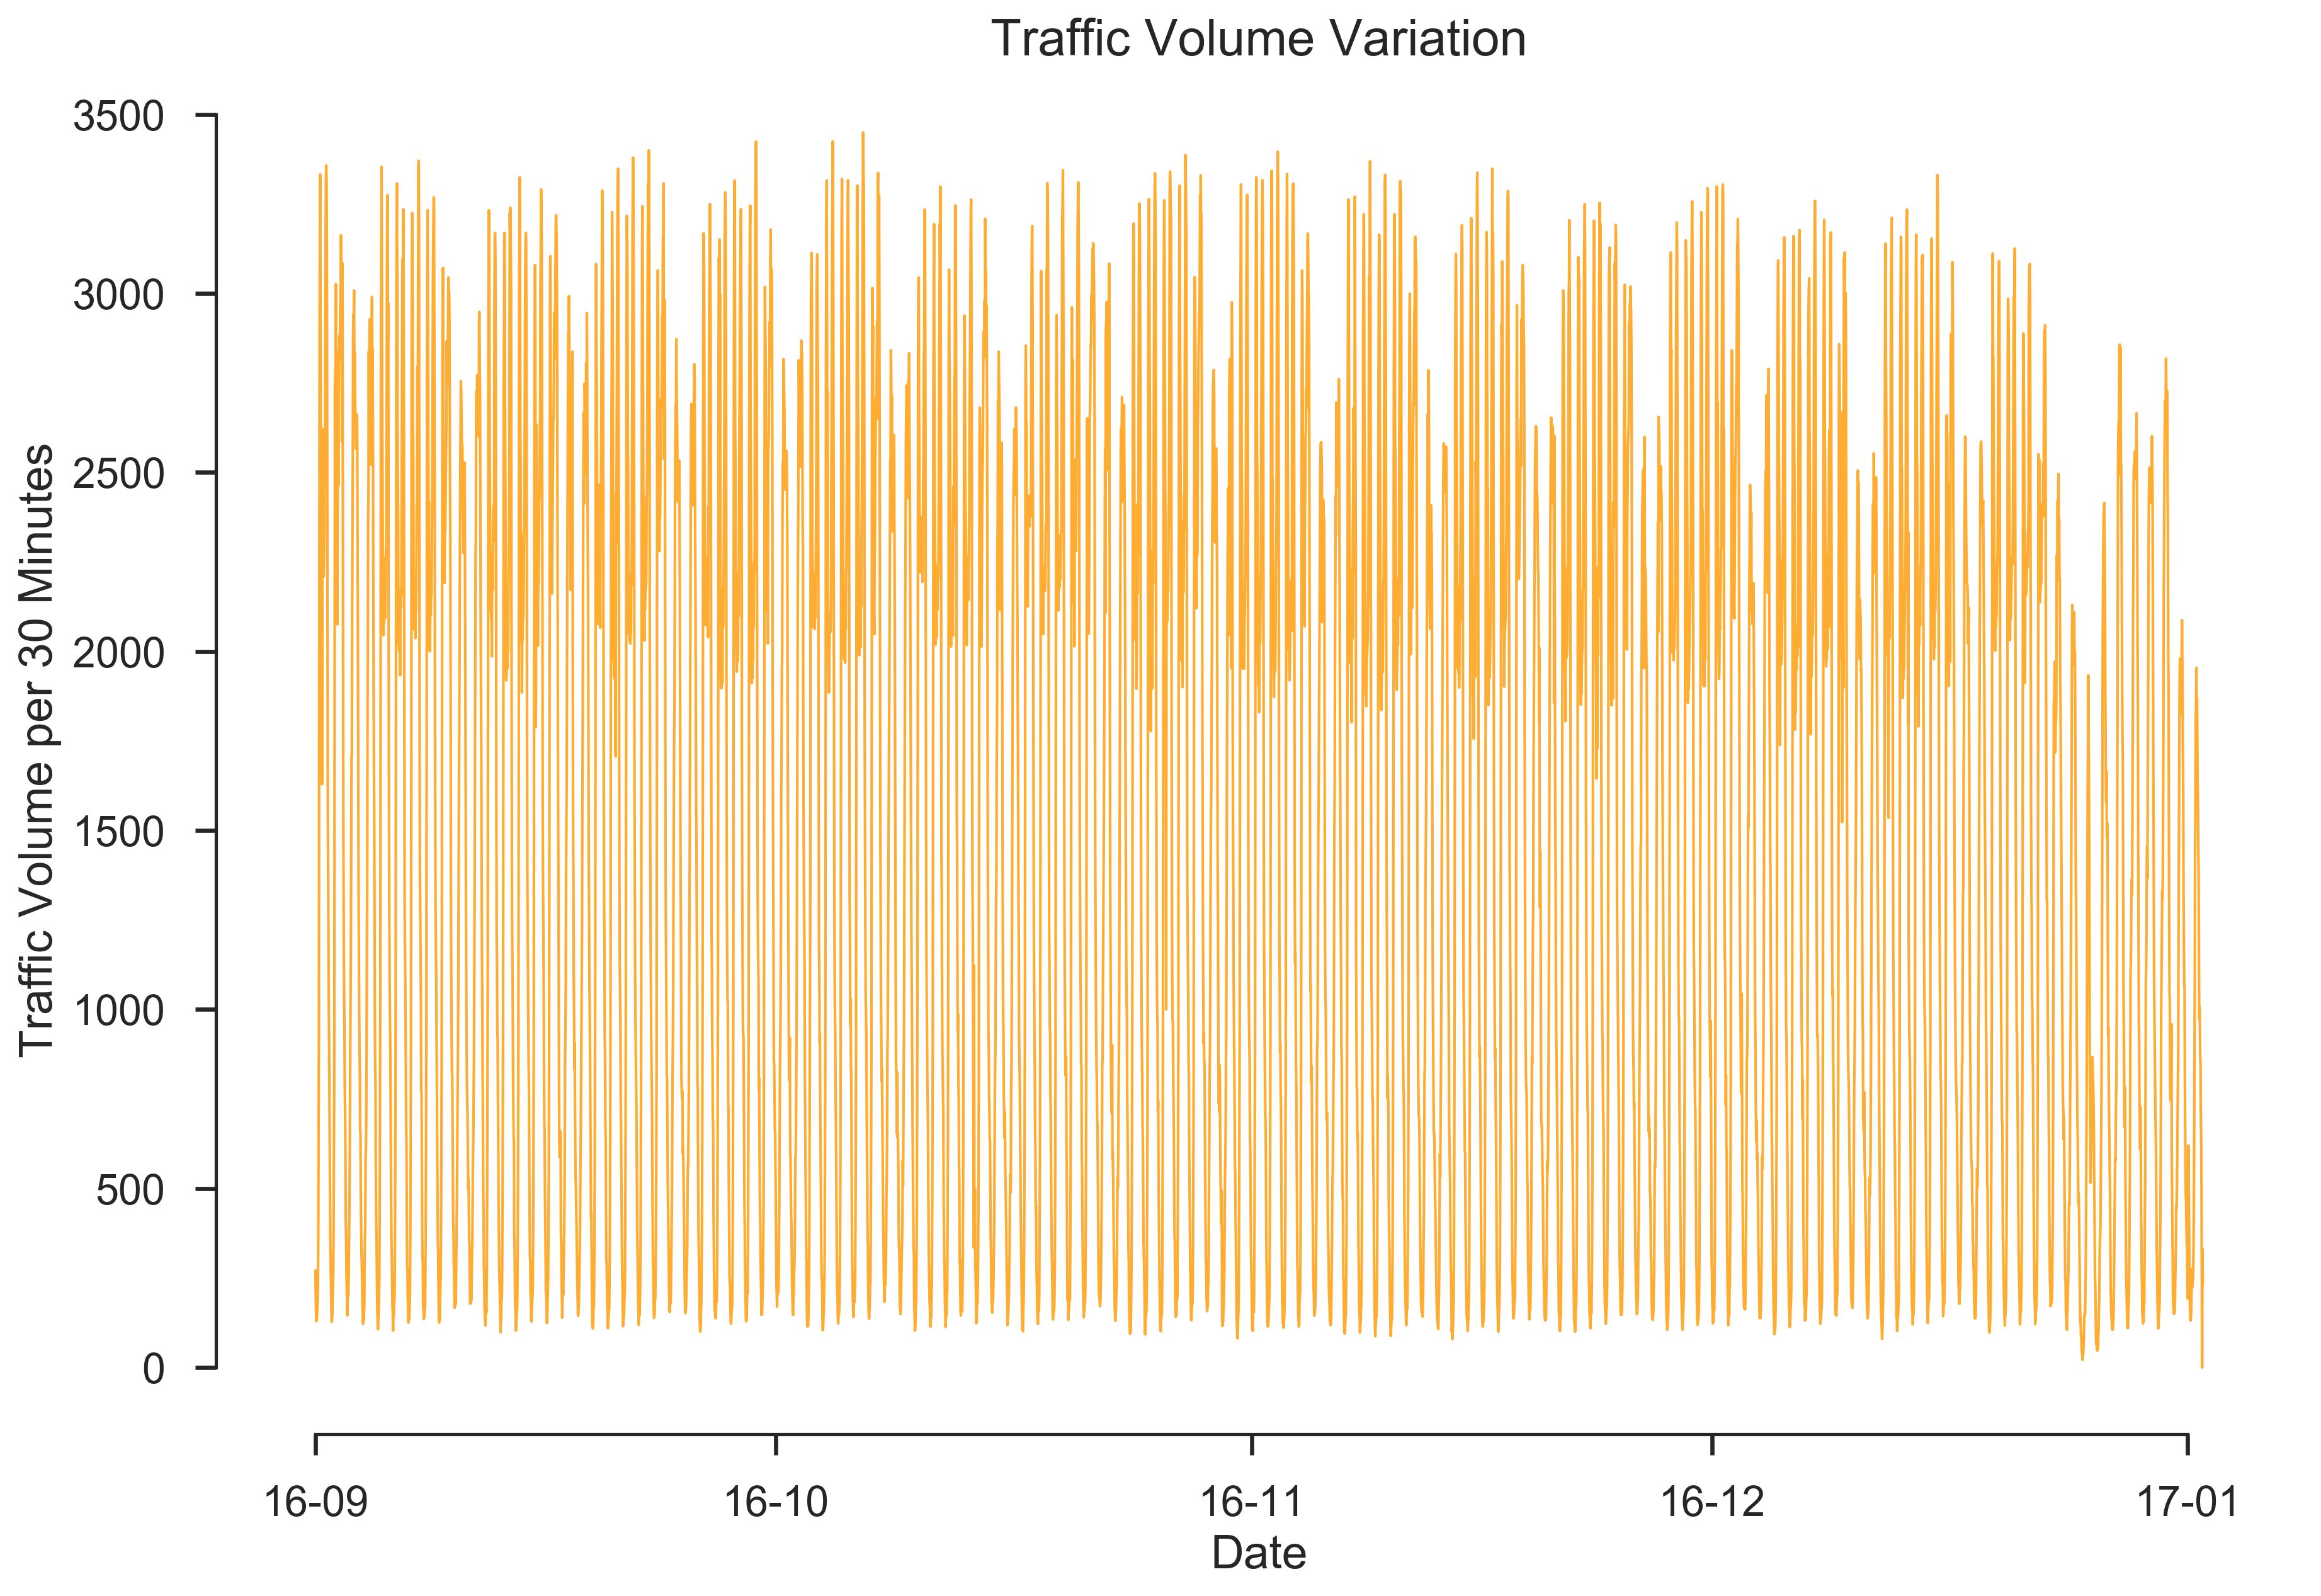

In [42]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(dpi=300)
ax.plot(dft2.loc['2016-09-01':'2017-01-01'].index, dft2.loc['2016-09-01':'2017-01-01'].values,
        linewidth=1, color=c_orange, alpha=0.8)
plt.title('Traffic Volume Variation')
plt.ylabel('Traffic Volume per 30 Minutes')
plt.xlabel('Date')
plt.tight_layout()
ax.xaxis.set_major_locator(mdates.MonthLocator())
Fmt = mdates.DateFormatter("%y-%m")
ax.xaxis.set_major_formatter(Fmt)
sns.despine(offset=2, trim=True)
plt.savefig('trf-var-1609-1701.png')

In [8]:
dft3 = dft2.loc['2016-09-01':'2017-01-01']

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(dft3.values, freq=336)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

C:\Users\brian1123\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


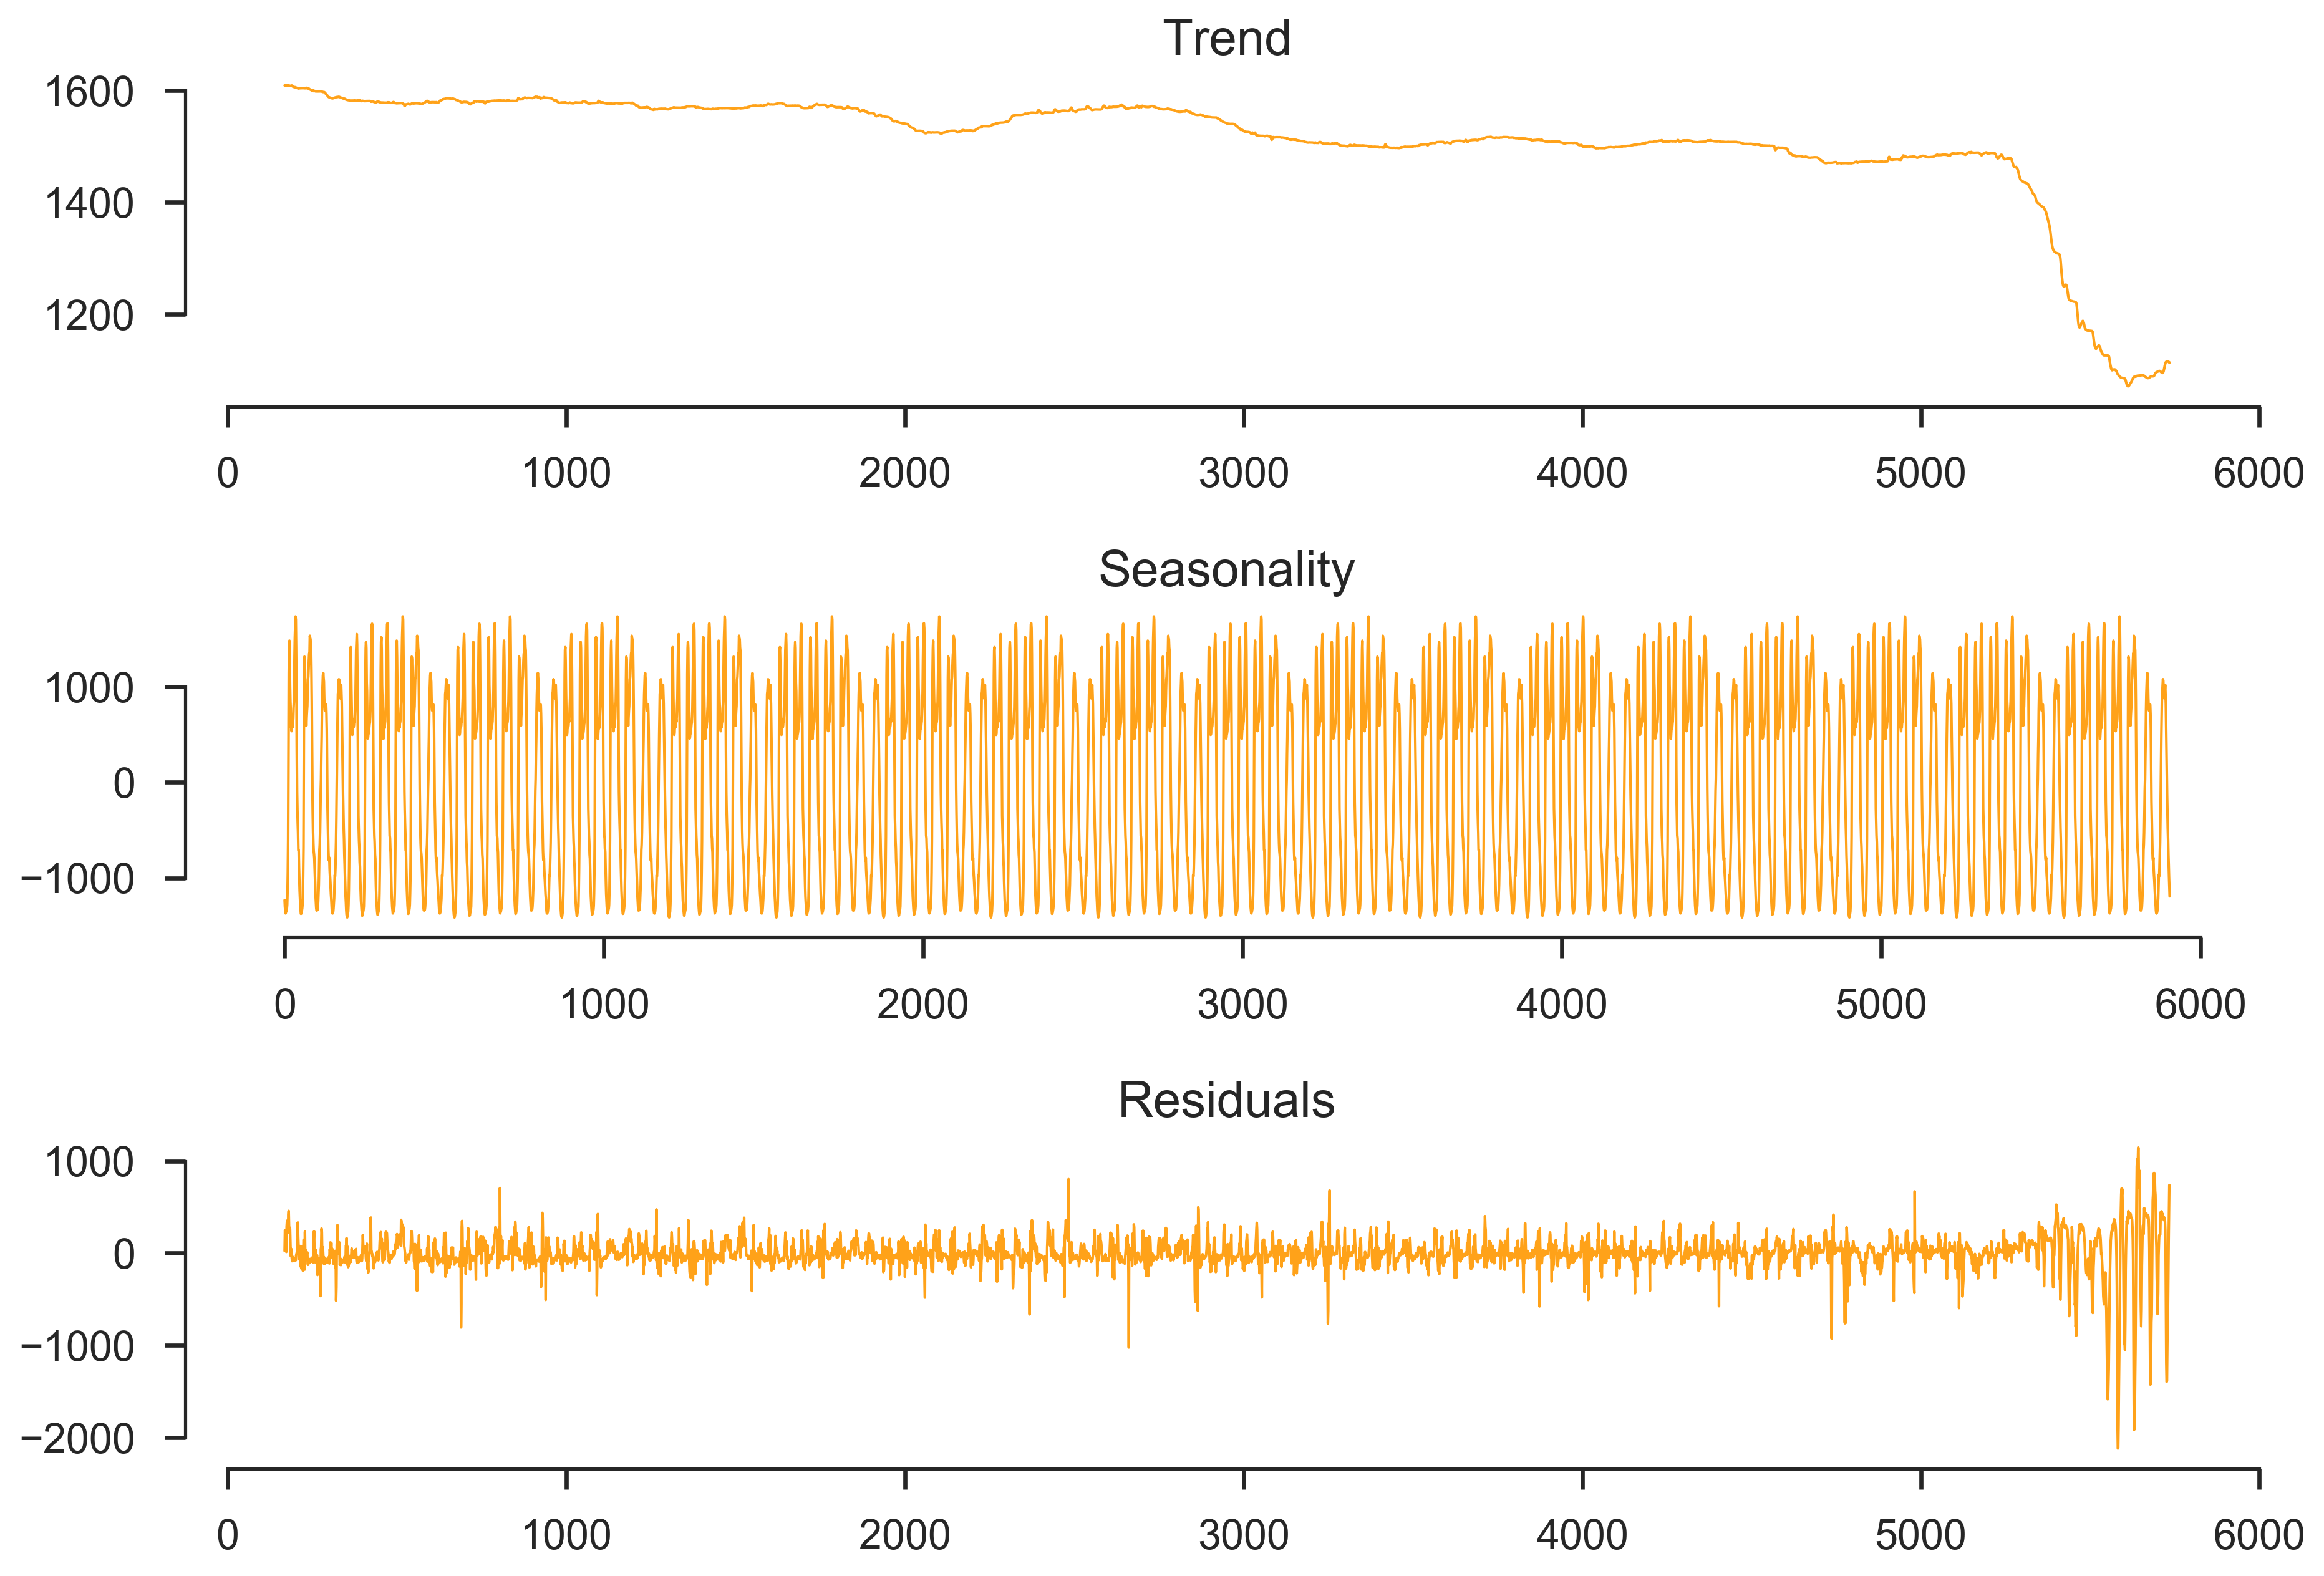

In [66]:
plt.figure(dpi=300)

plt.subplot(311)
plt.plot(trend, linewidth=1, alpha=0.9, color=c_orange)
plt.title('Trend')
sns.despine(offset=2, trim=True)

plt.subplot(312)
plt.plot(seasonal, linewidth=1, alpha=0.9, color=c_orange)
plt.title('Seasonality')
sns.despine(offset=1, trim=True)

plt.subplot(313)
plt.plot(residual, linewidth=1, alpha=0.9, color=c_orange)
plt.title('Residuals')
sns.despine(offset=2, trim=True)

plt.tight_layout()
plt.savefig('trf-decompose.png')

## ARIMA

In [10]:
from statsmodels.tsa.stattools import acf, pacf

In [11]:
dft3.head()

timestamp
2016-09-01 00:00:00    271.0
2016-09-01 00:30:00    212.0
2016-09-01 01:00:00    157.0
2016-09-01 01:30:00    129.0
2016-09-01 02:00:00    134.0
Freq: 1800S, Name: trf_count, dtype: float64

In [12]:
X = dft3.values

In [83]:
# ACF and PACF plots:
lags = 48*7 # 1 day
lag_acf = acf(X, nlags=lags)
lag_pacf = pacf(X, nlags=lags, method='ols')

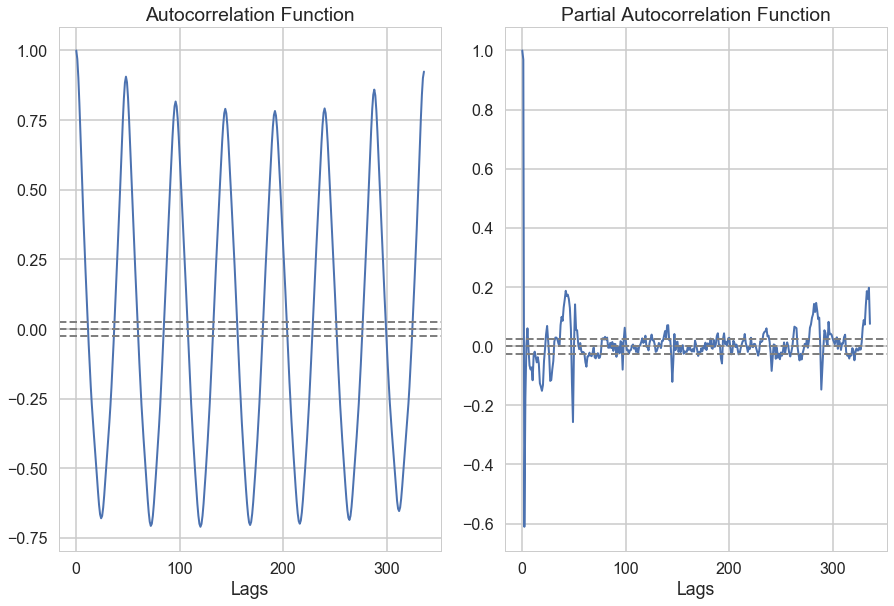

In [84]:
sns.set_style('whitegrid')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf, linewidth=2)
plt.axhline(y=0,linestyle='--',color='gray', linewidth=2)
plt.axhline(y=-1.96/np.sqrt(len(X)),linestyle='--',color='gray', linewidth=2)
plt.axhline(y=1.96/np.sqrt(len(X)),linestyle='--',color='gray', linewidth=2)
plt.xlabel('Lags')
plt.title('Autocorrelation Function')
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf, linewidth=2)
plt.axhline(y=0,linestyle='--',color='gray', linewidth=2)
plt.axhline(y=-1.96/np.sqrt(len(X)),linestyle='--',color='gray', linewidth=2)
plt.axhline(y=1.96/np.sqrt(len(X)),linestyle='--',color='gray', linewidth=2)
plt.xlabel('Lags')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

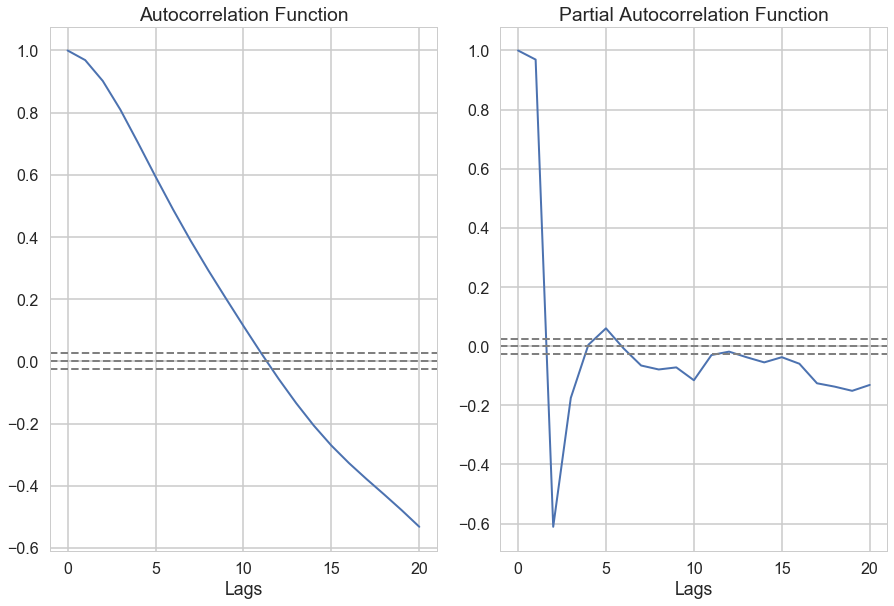

In [87]:
# ACF and PACF plots:
lags = 20 # 10 hours
lag_acf = acf(X, nlags=lags)
lag_pacf = pacf(X, nlags=lags, method='ols')

sns.set_style('whitegrid')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf, linewidth=2)
plt.axhline(y=0,linestyle='--',color='gray', linewidth=2)
plt.axhline(y=-1.96/np.sqrt(len(X)),linestyle='--',color='gray', linewidth=2)
plt.axhline(y=1.96/np.sqrt(len(X)),linestyle='--',color='gray', linewidth=2)
plt.xlabel('Lags')
plt.title('Autocorrelation Function')
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf, linewidth=2)
plt.axhline(y=0,linestyle='--',color='gray', linewidth=2)
plt.axhline(y=-1.96/np.sqrt(len(X)),linestyle='--',color='gray', linewidth=2)
plt.axhline(y=1.96/np.sqrt(len(X)),linestyle='--',color='gray', linewidth=2)
plt.xlabel('Lags')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

```
pacf for AR
acf for MA

choose p=4, q=11
```

In [13]:
from statsmodels.tsa.arima_model import ARIMA

In [14]:
model = ARIMA(X, order=(1, 0, 0)).fit()

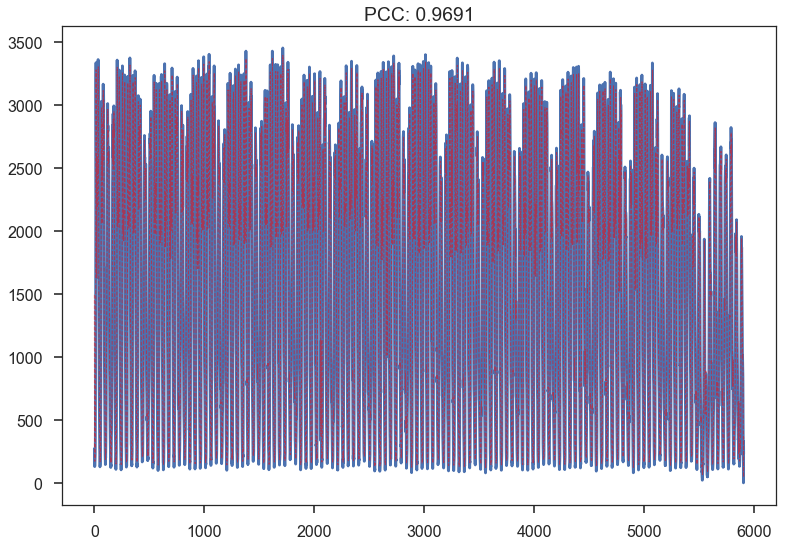

In [15]:
corr = np.corrcoef(model.fittedvalues, X)[0][1]

## Combined Model
plt.figure()
plt.plot(X)
plt.plot(model.fittedvalues, 'r--', alpha=0.5, linewidth=1)
# plt.title('MSE: {:.4f}'.format(sum((model.fittedvalues-X)**2)/len(X)))
plt.title('PCC: {:.4f}'.format(corr))


```
(4, 0, 11) MSE = 33500
```

In [98]:
X_pred = model.fittedvalues

In [100]:
np.corrcoef(X_pred, X)[0][1]

0.96914298148721101

In [113]:
# GridSearch

p_s = [0, 1, 2, 4, 8]
q_s = [0, 1, 2, 4, 8, 11]
d_s = [0, 1, 2]

In [114]:
def logical(p, d, q):
    # see if p, d, q combination logical
    # case 1: no (0, 0, 0)
    if p == 0 & d == 0 & q == 0:
        return False

In [117]:
for p in p_s:
    for q in q_s:
        for d in d_s:
            try:
                model = ARIMA(X, order=(p, d, q)).fit()
                corr = np.corrcoef(model.fittedvalues, X)[0][1]
                mse = sum((model.fittedvalues-X)**2)/len(X)
                print('Model ({},{},{}) -- PCC: {:.3f}; MSE: {:.3f}'.format(p, d, q, corr, mse))
            except:
                pass

Model (0,0,0) -- PCC: -0.000; MSE: 1083001.785
Model (0,0,1) -- PCC: 0.942; MSE: 330482.807
Model (1,0,0) -- PCC: 0.969; MSE: 65805.236
Model (1,0,1) -- PCC: 0.977; MSE: 49426.825
Model (1,0,2) -- PCC: 0.979; MSE: 44305.661
Model (1,0,4) -- PCC: 0.981; MSE: 40538.191
Model (1,0,8) -- PCC: 0.981; MSE: 39834.626
Model (1,0,11) -- PCC: 0.981; MSE: 40849.289
Model (2,0,0) -- PCC: 0.981; MSE: 41336.645
Model (2,0,1) -- PCC: 0.981; MSE: 40217.664
Model (2,0,2) -- PCC: 0.981; MSE: 39994.231
Model (2,0,4) -- PCC: 0.982; MSE: 38600.324


C:\Users\brian1123\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:584: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
C:\Users\brian1123\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:585: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
C:\Users\brian1123\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:585: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
C:\Users\brian1123\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:586: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/
C:\Users\brian1123\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:587: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
C:\Users\brian1123\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:587: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()


Model (4,0,0) -- PCC: 0.981; MSE: 40078.387
Model (4,0,1) -- PCC: 0.982; MSE: 39057.773
Model (4,0,2) -- PCC: 0.982; MSE: 39003.874


C:\Users\brian1123\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\brian1123\Anaconda3\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\brian1123\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model (4,0,4) -- PCC: 0.984; MSE: 34256.156


C:\Users\brian1123\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\brian1123\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model (4,0,8) -- PCC: 0.984; MSE: 35567.485


C:\Users\brian1123\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\brian1123\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model (4,0,11) -- PCC: 0.984; MSE: 33546.650


C:\Users\brian1123\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model (8,0,0) -- PCC: 0.982; MSE: 39515.999
Model (8,0,1) -- PCC: 0.982; MSE: 37673.618


C:\Users\brian1123\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model (8,0,2) -- PCC: 0.984; MSE: 34441.126


C:\Users\brian1123\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model (8,0,4) -- PCC: 0.984; MSE: 34061.859


C:\Users\brian1123\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\brian1123\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model (8,0,8) -- PCC: 0.984; MSE: 35149.178


C:\Users\brian1123\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\brian1123\Anaconda3\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\brian1123\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


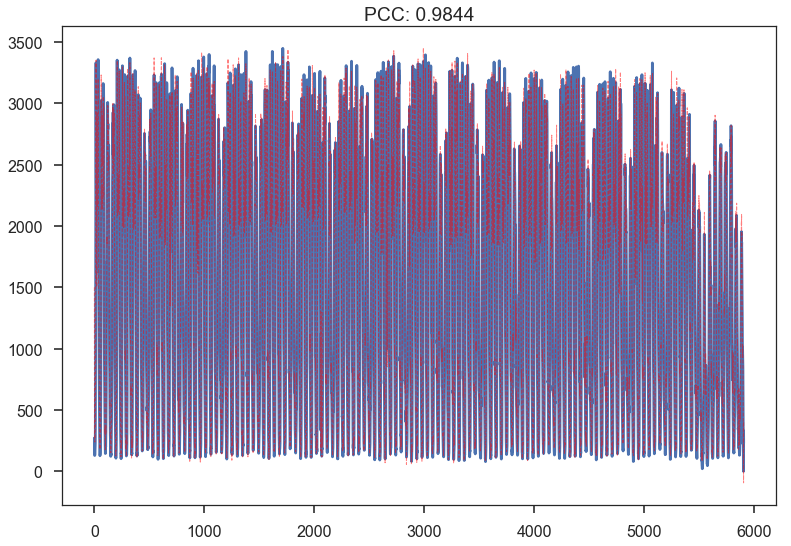

In [16]:
model = ARIMA(X, order=(4, 0, 11)).fit()
corr = np.corrcoef(model.fittedvalues, X)[0][1]

## Combined Model
plt.figure()
plt.plot(X)
plt.plot(model.fittedvalues, 'r--', alpha=0.5, linewidth=1)
# plt.title('MSE: {:.4f}'.format(sum((model.fittedvalues-X)**2)/len(X)))
plt.title('PCC: {:.4f}'.format(corr))
